<a href="https://colab.research.google.com/github/byteLm/ai/blob/main/%5BCV%5D_Car_Licenses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
This notebook trains a pre-trained YoloV8 model.
Used for study purposes only.

# 1. Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://pepy.tech/project/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


# 2. Download Dataset from Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0TiVJeqb8kl9VXL8aoD3")
project = rf.workspace("proctoringcars").project("car-licenses-2")
version = project.version(2)
dataset = version.download("yolov8")
!mv {dataset.location}/data.yaml {dataset.location}

# 3. Train


In [ ]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
model.train(data='/content/car-licenses-2-2/data.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg')  # predict on an image

Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/car-licenses-2-2/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]


Overriding model.yaml nc=80 with nc=32

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/car-licenses-2-2/train/labels... 8192 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8192/8192 [00:04<00:00, 1861.45it/s]


train: New cache created: /content/car-licenses-2-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2044, len(boxes) = 44410. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/car-licenses-2-2/valid/labels... 832 images, 0 backgrounds, 0 corrupt: 100%|██████████| 832/832 [00:00<00:00, 1014.35it/s]

val: New cache created: /content/car-licenses-2-2/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 244, len(boxes) = 4365. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000278, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.58G     0.8796      2.751      1.127        143        640: 100%|██████████| 512/512 [03:23<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]

                   all        832       4365      0.951      0.832      0.941      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.21G     0.7545      1.105      1.054        155        640: 100%|██████████| 512/512 [03:12<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]

                   all        832       4365      0.959      0.944       0.98       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.35G     0.7148     0.8867      1.025        117        640: 100%|██████████| 512/512 [03:10<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.55it/s]


                   all        832       4365      0.972      0.978      0.985      0.833

3 epochs completed in 0.175 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.3MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,011,888 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.65it/s]


                   all        832       4365      0.972      0.978      0.985      0.833
                     0        118        137      0.941      0.898      0.975      0.829
                     1        128        143          1      0.995      0.995       0.81
                     2        117        129      0.861      0.819      0.957      0.804
                     3        115        130       0.99          1      0.995      0.864
                     4        104        115      0.996          1      0.995      0.859
                     5         85         96      0.996          1      0.995      0.842
                     6        120        141      0.996          1      0.995      0.857
                     7        110        126      0.882      0.984      0.986      0.848
                     8        113        125      0.997          1      0.995      0.831
                     9        106        120      0.997          1      0.995      0.868
                     

100%|██████████| 134k/134k [00:00<00:00, 7.08MB/s]

image 1/1 /content/bus.jpg: 640x480 (no detections), 23.0ms
Speed: 3.5ms preprocess, 23.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'K', 19: 'L', 20: 'LicensePlate', 21: 'M', 22: 'N', 23: 'P', 24: 'R', 25: 'S', 26: 'T', 27: 'U', 28: 'V', 29: 'X', 30: 'Y', 31: 'Z'}
 obb: None
 orig_img: array([[[119, 146, 172],
         [121, 148, 174],
         [122, 152, 177],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[120, 147, 173],
         [122, 149, 175],
         [123, 153, 178],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[123, 150, 176],
         [124, 151, 177],
         [125, 155, 180],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        ...,
 
       

In [ ]:
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/car-licenses-2-2/valid/labels.cache... 832 images, 0 backgrounds, 0 corrupt: 100%|██████████| 832/832 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 244, len(boxes) = 4365. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:22<00:00,  2.32it/s]


                   all        832       4365      0.972      0.978      0.985      0.833
                     0        118        137      0.941      0.898      0.975      0.829
                     1        128        143          1      0.995      0.995       0.81
                     2        117        129      0.861      0.818      0.957      0.804
                     3        115        130       0.99          1      0.995      0.865
                     4        104        115      0.996          1      0.995      0.858
                     5         85         96      0.996          1      0.995      0.845
                     6        120        141      0.996          1      0.995      0.854
                     7        110        126      0.882      0.984      0.986       0.85
                     8        113        125      0.997          1      0.995      0.831
                     9        106        120      0.997          1      0.995      0.868
                     

# 4. Predict and Export


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/a.jpg: 448x640 1 LicensePlate, 20.6ms
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
Speed: 6.0ms preprocess, 20.6ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([20.], device='cuda:0')
conf: tensor([0.4010], device='cuda:0')
data: tensor([[190.8848, 103.9740, 261.6154, 137.0943,   0.4010,  20.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (183, 275)
shape: torch.Size([1, 6])
xywh: tensor([[226.2501, 120.5342,  70.7307,  33.1202]], device='cuda:0')
xywhn: tensor([[0.8227, 0.6587, 0.2572, 0.1810]], device='cuda:0')
xyxy: tensor([[190.8848, 103.9740, 261.6154, 137.0943]], device='cuda:0')
xyxyn: tensor([[

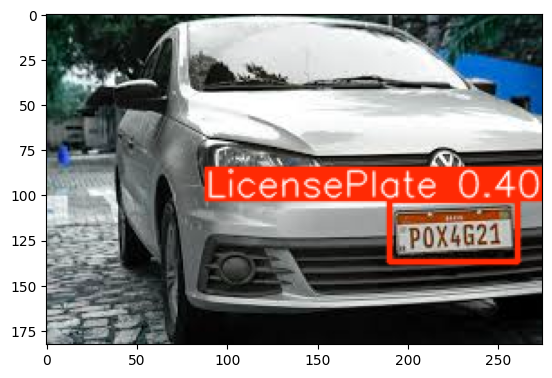

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


In [ ]:
results = model('/content/my-plate-img.jpg')  # predict on an image

# Assuming 'results' is a list of YOLO results objects, iterate through them
for result in results:
  print(result.boxes)  # Print detection boxes
  plt.imshow(result.plot())  # Plot the image with detection boxes
  result.save(filename='result.jpg')  # Save annotated image

In [ ]:
results = model.export(format='onnx')  # export the model to ONNX format